In [18]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.signal as spg
import scipy.constants as const
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize'] = 15

In [20]:
Q5to11 = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/initial_data/Qfac_eigensweep_5to11GHz.csv', skiprows=4)
Q1to5 = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/initial_data/Qfac_eigensweep_1to5GHz.csv', skiprows=4)

In [58]:
Q5to11['Frequency (GHz)']

0        4.628163
1        4.628538
2        4.645559
3        4.646161
4        4.650254
          ...    
3271    11.097586
3272    11.098678
3273    11.099977
3274    11.100193
3275    11.100483
Name: Frequency (GHz), Length: 3276, dtype: float64

In [22]:
Q1to5['Freq rounded'] = Q1to5['Frequency (GHz)'].round(6)


,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,1.000000e+09,6.830189170012751E-15+0.2445979144776972i,6.830189e-15,1.396208e-14
1,1.000000e+09,3.27849080160612E-14+0.25682555180211736i,3.278491e-14,6.382719e-14
2,1.000000e+09,-1.2142558524467114E-15+0.7279293765572199i,-1.214256e-15,-8.340478e-16
3,1.000000e+09,-7.133753133124429E-15+0.7288109866512557i,-7.133753e-15,-4.894104e-15
4,1.000000e+09,1.931087241479181E-10-1.0667860374540662E-6i,1.931087e-10,9.050959e-05
...,...,...,...,...
1957,4.500000e+09,4.914948370702858+0.020805014772947626i,4.914948e+00,1.181193e+02
1958,4.500000e+09,4.917434238740645+4.6293000632622715E-4i,4.917434e+00,5.311207e+03
1959,4.500000e+09,4.918208191862103+4.4181046560515057E-4i,4.918208e+00,5.565971e+03
1960,4.500000e+09,4.920111046737906+0.0367318309006274i,4.920111e+00,6.697340e+01


In [23]:
Q_peaks, _ = spg.find_peaks(Q5to11['Quality factor (1)'])
Q_peak_freqs = Q5to11['Frequency (GHz)'].loc[Q_peaks]
Q_peak_Qs = Q5to11['Quality factor (1)'].loc[Q_peaks]
peak_dict = {'freqs': Q_peak_freqs, 'Q': Q_peak_Qs}
peaks = pd.DataFrame(peak_dict).sort_values('Q', ascending=False).reset_index(inplace=False)


In [24]:
Q_peaks1, _1 = spg.find_peaks(Q1to5['Quality factor (1)'])
Q_peak_freqs1 = Q1to5['Frequency (GHz)'].loc[Q_peaks1]
Q_peak_Qs1 = Q1to5['Quality factor (1)'].loc[Q_peaks1]
Q_cfs1 = Q1to5['% search_freq (Hz)'].loc[Q_peaks1]
peak_dict1 = {'cf': Q_cfs1, 'freqs': Q_peak_freqs1, 'Q': Q_peak_Qs1}
peaks1 = pd.DataFrame(peak_dict1).sort_values('Q', ascending=False).reset_index(inplace=False)

In [25]:
peaks1.head(20)

,index,cf,freqs,Q
0,1348,3.500000e+09,3.636493,2.646877e+06
1,1467,4.000000e+09,3.636493,2.646877e+06
2,1201,3.000000e+09,3.636493,2.646876e+06
3,1160,3.000000e+09,3.419733,2.142367e+06
4,1286,3.500000e+09,3.419733,2.142367e+06
5,1472,4.000000e+09,3.654254,1.818265e+06
6,1353,3.500000e+09,3.654254,1.818264e+06
7,1204,3.000000e+09,3.654254,1.818264e+06
8,1419,3.500000e+09,3.851059,1.315468e+06
9,1518,4.000000e+09,3.851059,1.315468e+06


In [26]:
Q3p5 = Q1to5[Q1to5['% search_freq (Hz)']==3.500000e+09].reset_index(inplace=False)
Q3p5

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,1206,3.500000e+09,2.952324342454842+0.042729854848116755i,2.952324,34.546389
1,1207,3.500000e+09,2.9524423663881834+0.042726034106906854i,2.952442,34.550859
2,1208,3.500000e+09,2.9730289830900976+0.05527603959942734i,2.973029,26.892565
3,1209,3.500000e+09,2.9731717234251365+0.05529834140712064i,2.973172,26.883010
4,1210,3.500000e+09,2.9836220924701293+0.010530615311056243i,2.983622,141.664186
...,...,...,...,...,...
247,1453,3.500000e+09,4.027844956817119+0.08146487553340076i,4.027845,24.721360
248,1454,3.500000e+09,4.028264122066064+0.08114003194808851i,4.028264,24.822914
249,1455,3.500000e+09,4.029145436671413+0.05883125222905284i,4.029145,34.243240
250,1456,3.500000e+09,4.029356863798607+0.05844382226154093i,4.029357,34.472051


In [27]:
Qfreq_arr = np.array([Q3p5['Frequency (GHz)'], Q3p5['Quality factor (1)']])

In [28]:
Qfreq_arr[0]

array([2.95232434, 2.95244237, 2.97302898, 2.97317172, 2.98362209,
       2.98366239, 2.98439432, 2.98450314, 3.02931039, 3.02949892,
       3.03684536, 3.03694478, 3.07754545, 3.07776805, 3.11040571,
       3.11048061, 3.12840093, 3.12853091, 3.15180516, 3.15186002,
       3.15961805, 3.15974883, 3.16241257, 3.17131265, 3.17138337,
       3.17160197, 3.17165209, 3.20227785, 3.20238859, 3.2026638 ,
       3.20277574, 3.21370586, 3.22411672, 3.22417026, 3.23559421,
       3.23579579, 3.25266741, 3.25277511, 3.25286971, 3.25709324,
       3.25728407, 3.26731351, 3.26739743, 3.26874267, 3.26880057,
       3.26947106, 3.26956013, 3.27680829, 3.27697487, 3.27898619,
       3.2791817 , 3.31268133, 3.31289496, 3.31535056, 3.31548675,
       3.31988092, 3.31992077, 3.32569939, 3.32571248, 3.33778043,
       3.35695126, 3.3570497 , 3.37815128, 3.378364  , 3.37915297,
       3.37920796, 3.38272632, 3.38282379, 3.38471479, 3.38485503,
       3.39406094, 3.39405981, 3.3943864 , 3.3944247 , 3.39483

In [29]:
Qfreq_arr[1]

array([3.45463886e+01, 3.45508591e+01, 2.68925651e+01, 2.68830099e+01,
       1.41664186e+02, 1.41521764e+02, 1.75401784e+05, 1.69905478e+05,
       2.96870274e+01, 2.96680791e+01, 2.32484482e+02, 2.32485003e+02,
       4.63091873e+04, 4.62994143e+04, 4.19083502e+01, 4.18604951e+01,
       2.40564867e+02, 2.40694857e+02, 6.94060438e+01, 6.93855938e+01,
       4.22189046e+00, 4.21990675e+00, 6.24134583e+01, 5.05825623e+00,
       5.05724590e+00, 5.05388982e+00, 5.05378272e+00, 4.04776035e+01,
       4.04545038e+01, 7.31940007e+05, 7.52854916e+05, 2.95846882e+01,
       1.09871644e+01, 1.09960636e+01, 4.62974392e+02, 4.62849048e+02,
       4.37532216e+00, 6.08587662e+02, 6.07944741e+02, 2.32692087e+01,
       2.32751945e+01, 2.11392195e+05, 2.09014205e+05, 4.45635441e+00,
       4.45608210e+00, 4.36784389e+00, 4.36737594e+00, 5.28104026e+00,
       5.28027103e+00, 4.09265974e+00, 4.09448275e+00, 2.66579407e+01,
       2.66471095e+01, 3.68633576e+00, 3.68705245e+00, 3.62108704e+01,
      

In [30]:
param_array = np.array([1.000000e+09, 1.500000e+09, 2.000000e+09,2.500000e+09, 
                        3.000000e+09, 3.500000e+09, 4.000000e+09, 4.500000e+09])

In [31]:
param_array

array([1.0e+09, 1.5e+09, 2.0e+09, 2.5e+09, 3.0e+09, 3.5e+09, 4.0e+09,
       4.5e+09])

In [32]:
# peak_index_dict = {}
# peaks_per_step = []

# for i in range(len(param_array)): 
#     peaks_i = peaks1[peaks1['cf']==param_array[i]].reset_index(inplace=False)
#     top_peaks_i = peaks_i.iloc[0:5]
#     top_peaks_i_arr = np.array(top_peaks_i['level_0'])
#     peaks_per_step.append(top_peaks_i)
#     peak_index_dict[i] = {'Param Freq Step': param_array[i], 'Peak indices': top_peaks_i_arr}

Q_peaks, _ = spg.find_peaks(Q5to11['Quality factor (1)'])
Q_peak_freqs = Q5to11['Frequency (GHz)'].loc[Q_peaks]
Q_peak_Qs = Q5to11['Quality factor (1)'].loc[Q_peaks]
peak_dict = {'freqs': Q_peak_freqs, 'Q': Q_peak_Qs}
peaks = pd.DataFrame(peak_dict).sort_values('Q', ascending=False).reset_index(inplace=False)

peak_index_dict = {}
peaks_per_step = []

for i in range(len(param_array)): 
    signal_step_i = Q1to5[Q1to5['% search_freq (Hz)']==param_array[i]].reset_index(inplace=False)
    Q_peaks_i, _ = spg.find_peaks(signal_step_i['Quality factor (1)'])
    Q_table_peak_freqs_indexed = signal_step_i.loc[Q_peaks_i]
    

In [33]:
Q_table_peak_freqs_indexed.sort_values('Quality factor (1)', ascending=False)

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
33,1743,4.500000e+09,4.251601124202013+3.069593384558052E-6i,4.251601,692534.904719
93,1803,4.500000e+09,4.452526109765682+5.828268065907072E-6i,4.452526,381976.777613
112,1822,4.500000e+09,4.497609033408752+6.045720169808491E-6i,4.497609,371966.358604
194,1904,4.500000e+09,4.712954072899381+7.145598559204155E-6i,4.712954,329780.216020
96,1806,4.500000e+09,4.4539448093573295+6.83697011808675E-6i,4.453945,325725.045775
...,...,...,...,...,...
154,1864,4.500000e+09,4.614425480868979+0.33802127681960925i,4.614425,6.825644
99,1809,4.500000e+09,4.464703608015973+0.35098113563384475i,4.464704,6.360318
76,1786,4.500000e+09,4.407743281183978+0.3500574282352008i,4.407743,6.295743
74,1784,4.500000e+09,4.40717911499167+0.35006425117974654i,4.407179,6.294815


In [34]:
peak_index_dict = {}
peaks_per_step = []

for i in range(len(param_array)): 
    signal_step_i = Q1to5[Q1to5['% search_freq (Hz)']==param_array[i]].reset_index(inplace=False)
    Q_peaks_i, _ = spg.find_peaks(signal_step_i['Quality factor (1)'])
    Q_table_indexed = signal_step_i.loc[Q_peaks_i]
    max_Q_peaks = Q_table_indexed.sort_values('Quality factor (1)', ascending=False).iloc[0:9]
    peaks_per_step.append(max_Q_peaks)
    peak_index_dict[i] = {'center freq (param)': param_array[i], 'indices': max_Q_peaks.index}

In [35]:
peaks_per_step[0]

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
209,209,1.000000e+09,2.764665463103698+3.2764468947045604E-5i,2.764665e+00,42189.993489
167,167,1.000000e+09,2.542740062005031+1.309353114378523E-4i,2.542740e+00,9709.909550
197,197,1.000000e+09,2.7056450825310425+5.82026197218829E-4i,2.705645e+00,2324.332732
131,131,1.000000e+09,2.317468694337474+5.106306705005125E-4i,2.317469e+00,2269.221992
34,34,1.000000e+09,9.61805829920915E-7-3.880224331556862E-10i,9.618058e-07,1239.368845
160,160,1.000000e+09,2.5216930066026237+0.0022784468054909647i,2.521693e+00,553.379829
103,103,1.000000e+09,2.086924796693042+0.0019301202730809095i,2.086925e+00,540.620402
36,36,1.000000e+09,9.873565758624654E-7-1.539074584367554E-9i,9.873566e-07,320.763070
30,30,1.000000e+09,8.316254053385899E-7+2.60302651504735E-9i,8.316254e-07,159.742016


In [36]:
peaks_per_step[3]

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
227,929,2.500000e+09,3.202775739272698+2.127086955369355E-6i,3.202776,752854.915308
238,940,2.500000e+09,3.267313510135481+7.728084545083075E-6i,3.267314,211392.194992
181,883,2.500000e+09,2.984394321519634+8.507308927374054E-6i,2.984394,175401.783748
198,900,2.500000e+09,3.077545447045867+3.322823856672345E-5i,3.077545,46309.187303
136,838,2.500000e+09,2.7646654631037024+3.2764468953837324E-5i,2.764665,42189.993480
158,860,2.500000e+09,2.890505698947765+1.4126477183534997E-4i,2.890506,10230.808649
94,796,2.500000e+09,2.5427400620050333+1.3093531143398875E-4i,2.542740,9709.909551
124,826,2.500000e+09,2.705645082531041+5.820261972193477E-4i,2.705645,2324.332732
58,760,2.500000e+09,2.3174686943374785+5.106306705024312E-4i,2.317469,2269.221992


In [37]:
peaks_per_step[4]

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
247,1201,3.000000e+09,3.636492718763086+6.869403870354453E-7i,3.636493,2.646876e+06
206,1160,3.000000e+09,3.4197334551640943+7.981205238355191E-7i,3.419733,2.142367e+06
250,1204,3.000000e+09,3.654253565761168+1.0048740593912203E-6i,3.654254,1.818264e+06
213,1167,3.000000e+09,3.459837841141745+1.948877446388188E-6i,3.459838,8.876489e+05
152,1106,3.000000e+09,3.202775739272705+2.127086957388304E-6i,3.202776,7.528549e+05
167,1121,3.000000e+09,3.267313510135485+7.72808454367035E-6i,3.267314,2.113922e+05
106,1060,3.000000e+09,2.984394321519636+8.507308932030348E-6i,2.984394,1.754018e+05
123,1077,3.000000e+09,3.0775454470458685+3.322823856997654E-5i,3.077545,4.630919e+04
61,1015,3.000000e+09,2.7646654631037086+3.27644689568118E-5i,2.764665,4.218999e+04


In [38]:
peaks_per_step[5]

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
142,1348,3.500000e+09,3.6364927187631118+6.869403698909434E-7i,3.636493,2.646877e+06
80,1286,3.500000e+09,3.4197334551640983+7.981205292579457E-7i,3.419733,2.142367e+06
147,1353,3.500000e+09,3.6542535657611572+1.0048740399706282E-6i,3.654254,1.818264e+06
213,1419,3.500000e+09,3.851059046025229+1.4637600504365275E-6i,3.851059,1.315468e+06
87,1293,3.500000e+09,3.459837841141752+1.9488774404100173E-6i,3.459838,8.876489e+05
30,1236,3.500000e+09,3.2027757392727048+2.1270869532956843E-6i,3.202776,7.528549e+05
216,1422,3.500000e+09,3.852643007138908+2.7054383957927237E-6i,3.852643,7.120182e+05
41,1247,3.500000e+09,3.2673135101354918+7.728084552758627E-6i,3.267314,2.113922e+05
6,1212,3.500000e+09,2.9843943215196673+8.507308900587465E-6i,2.984394,1.754018e+05


In [39]:
peaks_per_step[6]

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
9,1467,4.000000e+09,3.6364927187631193+6.86940371412244E-7i,3.636493,2.646877e+06
14,1472,4.000000e+09,3.6542535657611825+1.0048740319823617E-6i,3.654254,1.818265e+06
60,1518,4.000000e+09,3.8510590460252376+1.4637600567482886E-6i,3.851059,1.315468e+06
122,1580,4.000000e+09,4.050446077146058+1.943313342168828E-6i,4.050446,1.042150e+06
63,1521,4.000000e+09,3.8526430071389135+2.7054383967661903E-6i,3.852643,7.120182e+05
197,1655,4.000000e+09,4.2516011242020015+3.069593385560111E-6i,4.251601,6.925349e+05
130,1588,4.000000e+09,4.067918787170149+3.851811096349226E-6i,4.067919,5.280527e+05
247,1705,4.000000e+09,4.452526109765686+5.8282680747923E-6i,4.452526,3.819768e+05
250,1708,4.000000e+09,4.4539448093573295+6.836970121514573E-6i,4.453945,3.257250e+05


In [40]:
peaks_per_step[7]

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
33,1743,4.500000e+09,4.251601124202013+3.069593384558052E-6i,4.251601,692534.904719
93,1803,4.500000e+09,4.452526109765682+5.828268065907072E-6i,4.452526,381976.777613
112,1822,4.500000e+09,4.497609033408752+6.045720169808491E-6i,4.497609,371966.358604
194,1904,4.500000e+09,4.712954072899381+7.145598559204155E-6i,4.712954,329780.216020
96,1806,4.500000e+09,4.4539448093573295+6.83697011808675E-6i,4.453945,325725.045775
166,1876,4.500000e+09,4.656494308123865+9.417868598393896E-6i,4.656494,247215.931050
210,1920,4.500000e+09,4.764442753174172+1.1130001080967583E-5i,4.764443,214036.041799
134,1844,4.500000e+09,4.547390087148155+1.0899102066396267E-5i,4.547390,208613.060941
64,1774,4.500000e+09,4.334082426956348+1.067712988774148E-5i,4.334082,202961.023820


In [41]:
peak_index_dict

{0: {'center freq (param)': 1000000000.0,
  'indices': Index([209, 167, 197, 131, 34, 160, 103, 36, 30], dtype='int64')},
 1: {'center freq (param)': 1500000000.0,
  'indices': Index([234, 189, 211, 147, 177, 111, 140, 83, 113], dtype='int64')},
 2: {'center freq (param)': 2000000000.0,
  'indices': Index([246, 207, 224, 162, 184, 120, 150, 84, 113], dtype='int64')},
 3: {'center freq (param)': 2500000000.0,
  'indices': Index([227, 238, 181, 198, 136, 158, 94, 124, 58], dtype='int64')},
 4: {'center freq (param)': 3000000000.0,
  'indices': Index([247, 206, 250, 213, 152, 167, 106, 123, 61], dtype='int64')},
 5: {'center freq (param)': 3500000000.0,
  'indices': Index([142, 80, 147, 213, 87, 30, 216, 41, 6], dtype='int64')},
 6: {'center freq (param)': 4000000000.0,
  'indices': Index([9, 14, 60, 122, 63, 197, 130, 247, 250], dtype='int64')},
 7: {'center freq (param)': 4500000000.0,
  'indices': Index([33, 93, 112, 194, 96, 166, 210, 134, 64], dtype='int64')}}

In [42]:
peak_index_dict[0]

{'center freq (param)': 1000000000.0,
 'indices': Index([209, 167, 197, 131, 34, 160, 103, 36, 30], dtype='int64')}

In [43]:
max_Q_peaks

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
33,1743,4.500000e+09,4.251601124202013+3.069593384558052E-6i,4.251601,692534.904719
93,1803,4.500000e+09,4.452526109765682+5.828268065907072E-6i,4.452526,381976.777613
112,1822,4.500000e+09,4.497609033408752+6.045720169808491E-6i,4.497609,371966.358604
194,1904,4.500000e+09,4.712954072899381+7.145598559204155E-6i,4.712954,329780.216020
96,1806,4.500000e+09,4.4539448093573295+6.83697011808675E-6i,4.453945,325725.045775
166,1876,4.500000e+09,4.656494308123865+9.417868598393896E-6i,4.656494,247215.931050
210,1920,4.500000e+09,4.764442753174172+1.1130001080967583E-5i,4.764443,214036.041799
134,1844,4.500000e+09,4.547390087148155+1.0899102066396267E-5i,4.547390,208613.060941
64,1774,4.500000e+09,4.334082426956348+1.067712988774148E-5i,4.334082,202961.023820


In [44]:
peak_index_dict

{0: {'center freq (param)': 1000000000.0,
  'indices': Index([209, 167, 197, 131, 34, 160, 103, 36, 30], dtype='int64')},
 1: {'center freq (param)': 1500000000.0,
  'indices': Index([234, 189, 211, 147, 177, 111, 140, 83, 113], dtype='int64')},
 2: {'center freq (param)': 2000000000.0,
  'indices': Index([246, 207, 224, 162, 184, 120, 150, 84, 113], dtype='int64')},
 3: {'center freq (param)': 2500000000.0,
  'indices': Index([227, 238, 181, 198, 136, 158, 94, 124, 58], dtype='int64')},
 4: {'center freq (param)': 3000000000.0,
  'indices': Index([247, 206, 250, 213, 152, 167, 106, 123, 61], dtype='int64')},
 5: {'center freq (param)': 3500000000.0,
  'indices': Index([142, 80, 147, 213, 87, 30, 216, 41, 6], dtype='int64')},
 6: {'center freq (param)': 4000000000.0,
  'indices': Index([9, 14, 60, 122, 63, 197, 130, 247, 250], dtype='int64')},
 7: {'center freq (param)': 4500000000.0,
  'indices': Index([33, 93, 112, 194, 96, 166, 210, 134, 64], dtype='int64')}}

In [45]:
max_Q_peaks.index

Index([33, 93, 112, 194, 96, 166, 210, 134, 64], dtype='int64')

In [46]:
peak_index_dict

{0: {'center freq (param)': 1000000000.0,
  'indices': Index([209, 167, 197, 131, 34, 160, 103, 36, 30], dtype='int64')},
 1: {'center freq (param)': 1500000000.0,
  'indices': Index([234, 189, 211, 147, 177, 111, 140, 83, 113], dtype='int64')},
 2: {'center freq (param)': 2000000000.0,
  'indices': Index([246, 207, 224, 162, 184, 120, 150, 84, 113], dtype='int64')},
 3: {'center freq (param)': 2500000000.0,
  'indices': Index([227, 238, 181, 198, 136, 158, 94, 124, 58], dtype='int64')},
 4: {'center freq (param)': 3000000000.0,
  'indices': Index([247, 206, 250, 213, 152, 167, 106, 123, 61], dtype='int64')},
 5: {'center freq (param)': 3500000000.0,
  'indices': Index([142, 80, 147, 213, 87, 30, 216, 41, 6], dtype='int64')},
 6: {'center freq (param)': 4000000000.0,
  'indices': Index([9, 14, 60, 122, 63, 197, 130, 247, 250], dtype='int64')},
 7: {'center freq (param)': 4500000000.0,
  'indices': Index([33, 93, 112, 194, 96, 166, 210, 134, 64], dtype='int64')}}

In [47]:
peaks_per_step[5]
# level_0 is the index out of 252 

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
142,1348,3.500000e+09,3.6364927187631118+6.869403698909434E-7i,3.636493,2.646877e+06
80,1286,3.500000e+09,3.4197334551640983+7.981205292579457E-7i,3.419733,2.142367e+06
147,1353,3.500000e+09,3.6542535657611572+1.0048740399706282E-6i,3.654254,1.818264e+06
213,1419,3.500000e+09,3.851059046025229+1.4637600504365275E-6i,3.851059,1.315468e+06
87,1293,3.500000e+09,3.459837841141752+1.9488774404100173E-6i,3.459838,8.876489e+05
30,1236,3.500000e+09,3.2027757392727048+2.1270869532956843E-6i,3.202776,7.528549e+05
216,1422,3.500000e+09,3.852643007138908+2.7054383957927237E-6i,3.852643,7.120182e+05
41,1247,3.500000e+09,3.2673135101354918+7.728084552758627E-6i,3.267314,2.113922e+05
6,1212,3.500000e+09,2.9843943215196673+8.507308900587465E-6i,2.984394,1.754018e+05


In [50]:
Q3p5[Q3p5['Quality factor (1)']==max(Q3p5['Quality factor (1)'])]

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
142,1348,3.500000e+09,3.6364927187631118+6.869403698909434E-7i,3.636493,2.646877e+06


In [51]:
Q1to5[Q1to5['% search_freq (Hz)']==4.000000e+09]

,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
1458,4.000000e+09,3.56673731199995+0.06238959939842968i,3.566737,28.584390
1459,4.000000e+09,3.566908320401023+0.062406090729940585i,3.566908,28.578207
1460,4.000000e+09,3.567605184081314+0.09323868467970652i,3.567605,19.131572
1461,4.000000e+09,3.567737468600785+0.09306703672432717i,3.567737,19.167568
1462,4.000000e+09,3.615094665316384+0.012411487998215391i,3.615095,145.635022
...,...,...,...,...
1705,4.000000e+09,4.452526109765686+5.8282680747923E-6i,4.452526,381976.777031
1706,4.000000e+09,4.452688483147707+0.10106320507310354i,4.452688,22.029227
1707,4.000000e+09,4.453728976563533+0.10117316171907488i,4.453729,22.010427
1708,4.000000e+09,4.4539448093573295+6.836970121514573E-6i,4.453945,325725.045612


In [52]:
peaks

,index,freqs,Q
0,26,4.712954,329780.215795
1,97,4.928874,266137.298083
2,7,4.656494,247215.930461
3,40,4.764443,214036.041885
4,291,5.274946,172515.024747
...,...,...,...
1080,651,6.071574,19.165595
1081,186,5.178869,9.880909
1082,105,4.955758,9.320661
1083,361,5.456312,8.883488


In [53]:
top_peaks = peaks[0:10]

In [54]:
top_peaks1 = peaks1[0:10]

In [55]:
def plot_Qvfreq(df):
    plt.plot(df['Frequency (GHz)'], df['Quality factor (1)'])
    plt.xlabel('Freq (GHz)')
    plt.ylabel('Q factor')
    plt.title('Q Factor vs. Eigenfrequency')

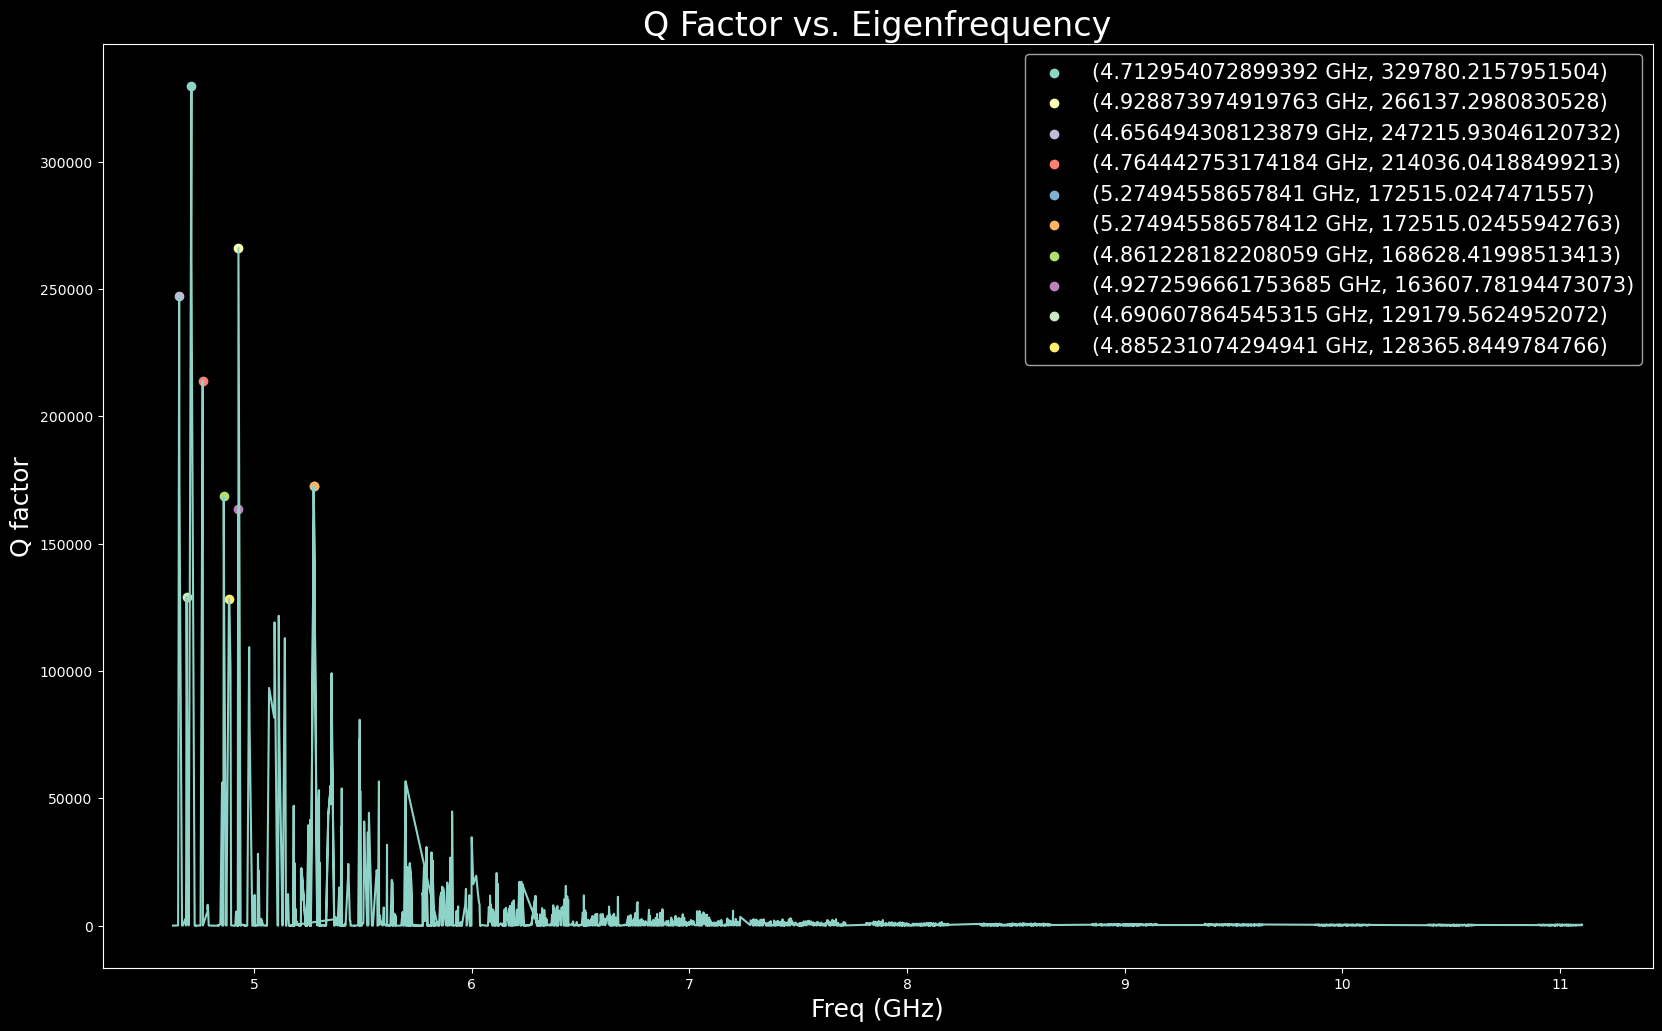

In [56]:
plt.figure(figsize = (20,12))
plot_Qvfreq(Q5to11)
for i in range(len(top_peaks)):
    plt.scatter(top_peaks['freqs'].loc[i], top_peaks['Q'].loc[i], 
                label = f'({top_peaks["freqs"][i]} GHz, {top_peaks["Q"][i]})')
plt.legend()

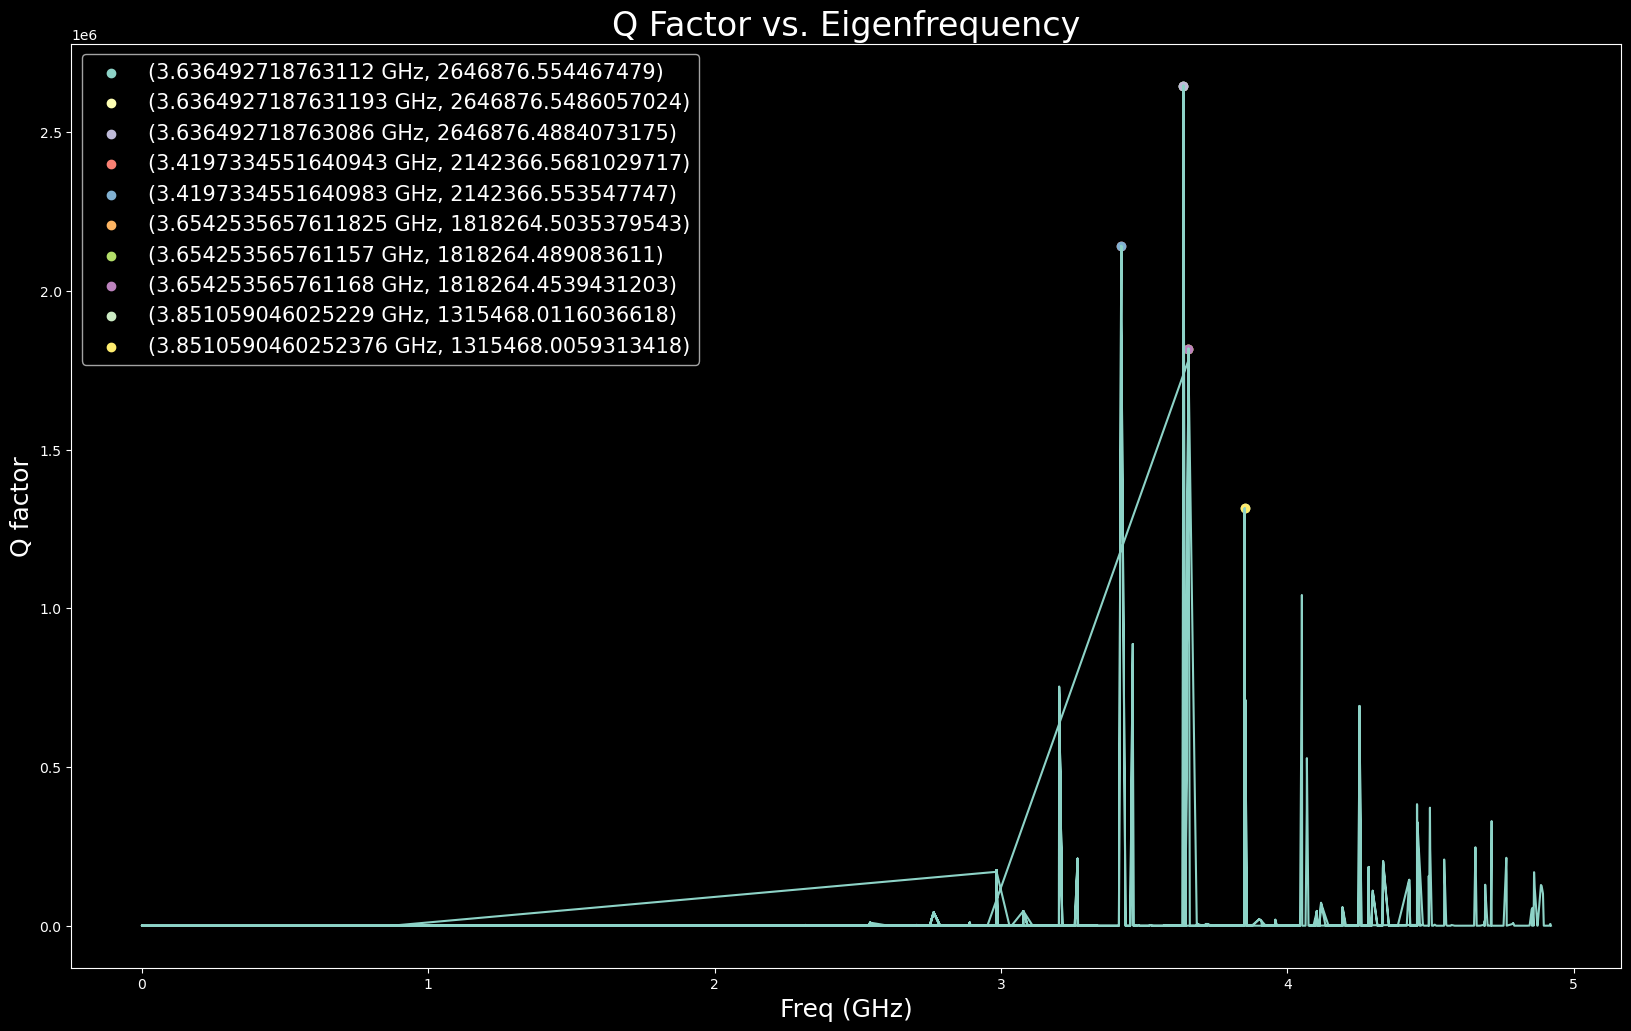

In [57]:
plt.figure(figsize = (20,12))
plot_Qvfreq(Q1to5)
for i in range(len(top_peaks1)):
    plt.scatter(top_peaks1['freqs'].loc[i], top_peaks1['Q'].loc[i], 
                label = f'({top_peaks1["freqs"][i]} GHz, {top_peaks1["Q"][i]})')
plt.legend()

In [1]:
Q1to5

NameError: name 'Q1to5' is not defined

In [108]:
all_Q = pd.concat([Q1to5, Q5to11])

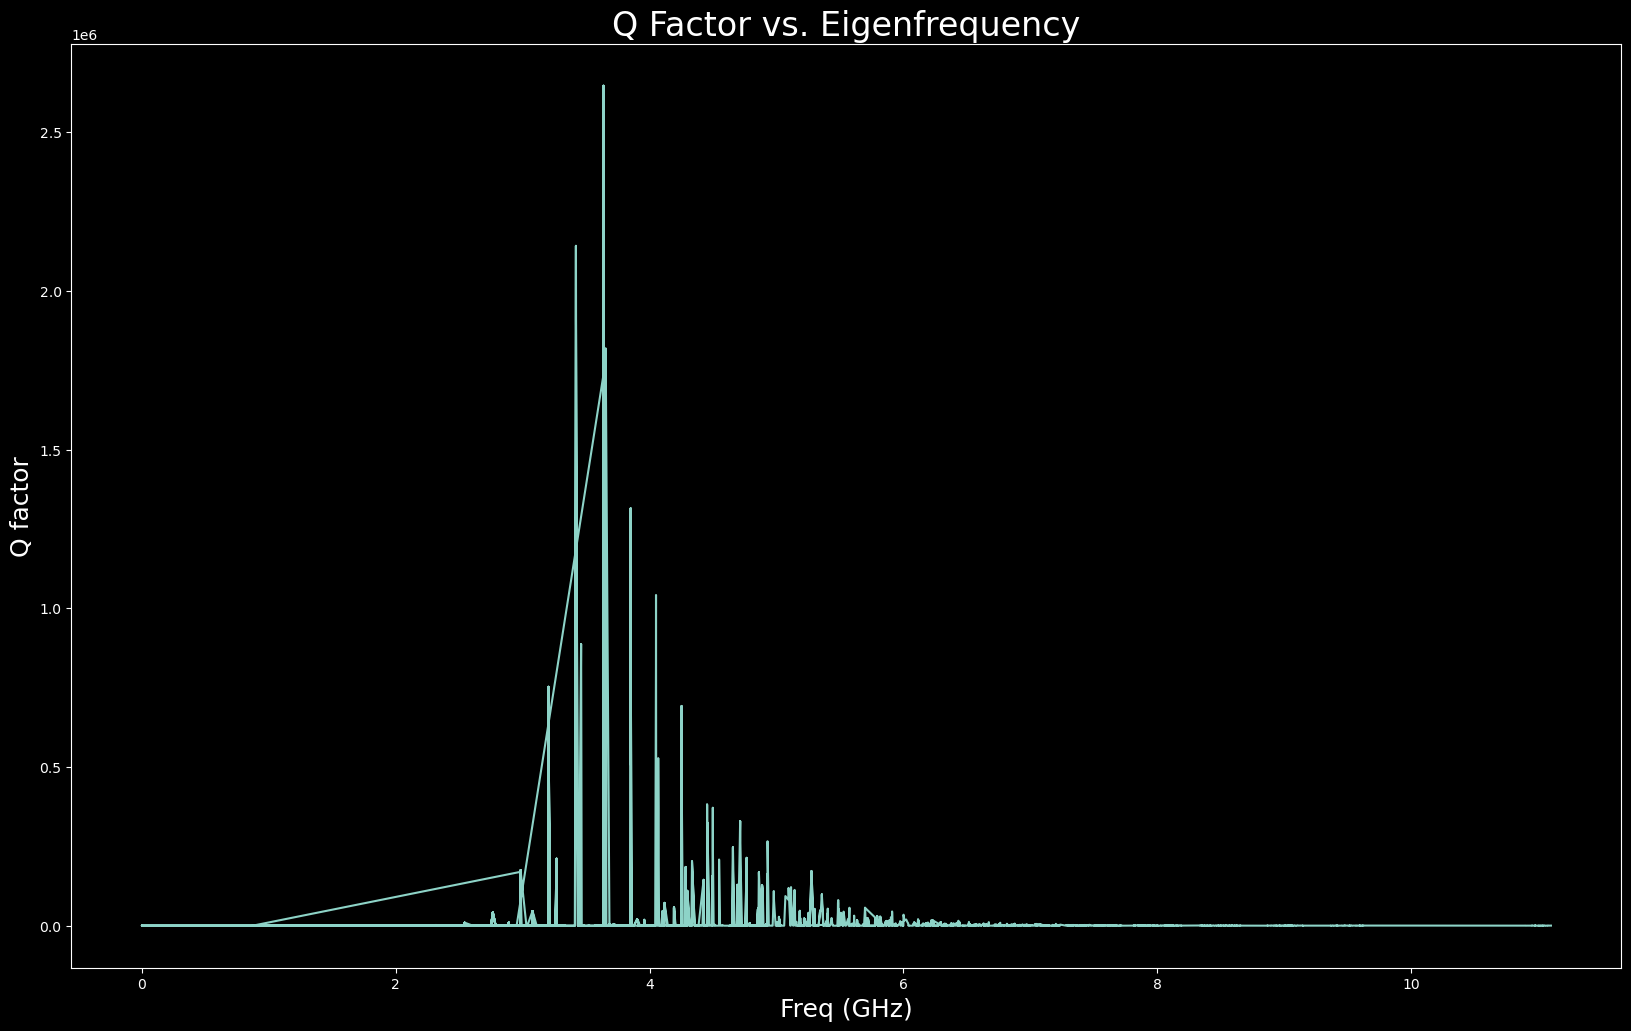

In [116]:
plt.figure(figsize = (20,12))
plot_Qvfreq(all_Q)